In [1]:
!pip install lazypredict scikit-learn==1.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
import lightgbm as lgb
from joblib import dump
import itertools
import matplotlib.pyplot as plt
import numpy as np
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [3]:
rice_df = pd.read_excel('rice_w2vec_4mer_100_dataset.xlsx')

In [4]:
df_cold = rice_df.query('stress == "-" or stress == "cold"').replace('-', 0).replace('cold', 1)

In [5]:
# Define X and y (target) variables
X = df_cold.drop(['circName','stress','tissue','chr','start','end','strand','start_anno', 'circID',	'gene', 'isoform', 'width', 'detection_score', 'stress_detection_score', 'end_anno', 'antisense', 'algorithm', 'seq', 'exonSeq', 'predAA', 'miRNA','superCircRNARegion'], axis=1)
y = df_cold['stress']

In [6]:
y.value_counts()

,count
stress,
0,50187
1,5724


In [7]:
ros = RandomUnderSampler(sampling_strategy=0.7)

X_res, y_res = ros.fit_resample(X, y)

In [8]:
y_res.value_counts()

,count
stress,
0,8177
1,5724


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=320)

In [10]:
clf = LazyClassifier(predictions=True, random_state=320)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [02:16<00:04,  4.55s/it]

[LightGBM] [Info] Number of positive: 4589, number of negative: 6531
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 11120, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412680 -> initscore=-0.352898
[LightGBM] [Info] Start training from score -0.352898


100%|██████████| 29/29 [02:18<00:00,  4.77s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.73,0.71,0.71,0.72,2.21
RandomForestClassifier,0.73,0.71,0.71,0.72,17.54
NuSVC,0.70,0.70,0.70,0.70,34.81
XGBClassifier,0.71,0.70,0.70,0.71,5.32
ExtraTreesClassifier,0.72,0.70,0.70,0.72,3.17
AdaBoostClassifier,0.70,0.69,0.69,0.70,11.55
SVC,0.69,0.68,0.68,0.69,12.91
BaggingClassifier,0.69,0.66,0.66,0.68,17.09
LogisticRegression,0.68,0.65,0.65,0.67,0.29


In [11]:
model_lgb = lgb.LGBMClassifier(random_state=320)
model_lgb.fit(X_train, y_train)

y_pred_lgb = model_lgb.predict(X_test)
report = classification_report(y_test, y_pred_lgb)
print(report)

[LightGBM] [Info] Number of positive: 4589, number of negative: 6531
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 11120, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412680 -> initscore=-0.352898
[LightGBM] [Info] Start training from score -0.352898
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1646
           1       0.68      0.64      0.66      1135

    accuracy                           0.73      2781
   macro avg       0.72      0.72      0.72      2781
weighted avg       0.73      0.73      0.73      2781



In [12]:
from sklearn.ensemble import RandomForestClassifier

modelrf = RandomForestClassifier(random_state=320)
modelrf.fit(X_train, y_train)

y_pred_rf = modelrf.predict(X_test)
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1646
           1       0.70      0.59      0.64      1135

    accuracy                           0.73      2781
   macro avg       0.72      0.71      0.71      2781
weighted avg       0.73      0.73      0.72      2781



In [13]:
from sklearn.ensemble import ExtraTreesClassifier

modelext = ExtraTreesClassifier(random_state=320)
modelext.fit(X_train, y_train)

y_pred_ext = modelext.predict(X_test)
report = classification_report(y_test, y_pred_ext)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1646
           1       0.68      0.60      0.63      1135

    accuracy                           0.72      2781
   macro avg       0.71      0.70      0.70      2781
weighted avg       0.72      0.72      0.72      2781



In [14]:
dump(model_lgb, 'lgb_model_cold_4mer_100.joblib')
print('LGB - Cold Model created.')

LGB - Cold Model created.


In [15]:
dump(modelrf, 'rf_model_cold_4mer_100.joblib')
print('RF - Cold Model created.')

RF - Cold Model created.


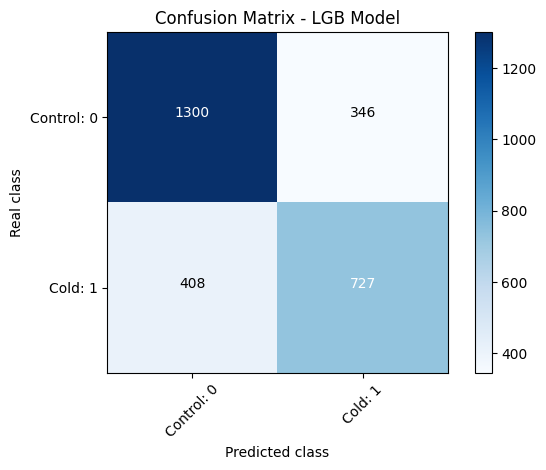

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred_lgb)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix - LGB Model',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #plt.ylim(0.5, 0.5)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylim(1.5, -0.5)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Real class')
    plt.xlabel('Predicted class')
    plt.tight_layout()

plot_confusion_matrix(cnf_matrix, classes=['Control: 0', 'Cold: 1'])


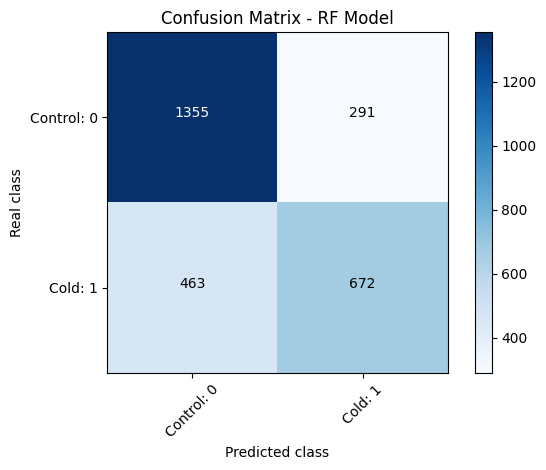

In [17]:

cnf_matrix = confusion_matrix(y_test, y_pred_rf)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix - RF Model',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #plt.ylim(0.5, 0.5)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylim(1.5, -0.5)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Real class')
    plt.xlabel('Predicted class')
    plt.tight_layout()

plot_confusion_matrix(cnf_matrix, classes=['Control: 0', 'Cold: 1'])

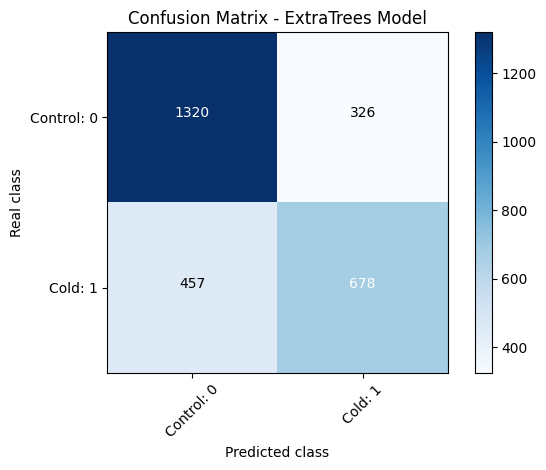

In [18]:
cnf_matrix = confusion_matrix(y_test, y_pred_ext)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix - ExtraTrees Model',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #plt.ylim(0.5, 0.5)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylim(1.5, -0.5)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Real class')
    plt.xlabel('Predicted class')
    plt.tight_layout()

plot_confusion_matrix(cnf_matrix, classes=['Control: 0', 'Cold: 1'])

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(model_lgb, X_res, y_res, cv=4)
print("Scores:", scores)
print("Median:", scores.mean())


[LightGBM] [Info] Number of positive: 4293, number of negative: 6132
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 10425, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411799 -> initscore=-0.356535
[LightGBM] [Info] Start training from score -0.356535
[LightGBM] [Info] Number of positive: 4293, number of negative: 6133
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 10426, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411759 -> initscore=-0.356698
[LightGBM] [Info] Start training from score -0.356698
[LightGBM] [

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(modelrf, X_res, y_res, cv=4)
print("Scores:", scores)
print("Median:", scores.mean())

Scores: [0.69649022 0.69064748 0.68892086 0.69899281]
Median: 0.6937628424303135


In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(modelext, X_res, y_res, cv=4)
print("Scores:", scores)
print("Median:", scores.mean())

Scores: [0.69275029 0.69093525 0.67482014 0.70676259]
Median: 0.6913170683246268


In [22]:

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
import numpy as np
y_prob = model_lgb.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.0, 1.1, 0.1)
results = []

for threshold in thresholds:
    y_pred_test = (y_prob >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred_test)

    results.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc,
        'Acurácia': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

    Threshold  Precision  Recall  F1 Score  AUC  Acurácia
0        0.00       0.41    1.00      0.58 0.78      0.41
1        0.10       0.44    0.98      0.60 0.78      0.48
2        0.20       0.50    0.93      0.65 0.78      0.60
3        0.30       0.56    0.86      0.68 0.78      0.67
4        0.40       0.61    0.75      0.68 0.78      0.71
5        0.50       0.68    0.64      0.66 0.78      0.73
6        0.60       0.71    0.49      0.58 0.78      0.71
7        0.70       0.78    0.34      0.48 0.78      0.69
8        0.80       0.82    0.16      0.27 0.78      0.64
9        0.90       0.74    0.01      0.02 0.78      0.60
10       1.00       0.00    0.00      0.00 0.78      0.59


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
import numpy as np
y_prob = modelrf.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.0, 1.1, 0.1)
results = []

for threshold in thresholds:
    y_pred_test = (y_prob >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred_test)

    results.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc,
        'Acurácia': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

    Threshold  Precision  Recall  F1 Score  AUC  Acurácia
0        0.00       0.41    1.00      0.58 0.78      0.41
1        0.10       0.42    0.99      0.59 0.78      0.44
2        0.20       0.45    0.97      0.61 0.78      0.50
3        0.30       0.51    0.89      0.65 0.78      0.61
4        0.40       0.59    0.79      0.67 0.78      0.69
5        0.50       0.69    0.61      0.65 0.78      0.73
6        0.60       0.76    0.40      0.53 0.78      0.71
7        0.70       0.81    0.22      0.34 0.78      0.66
8        0.80       0.83    0.09      0.16 0.78      0.62
9        0.90       0.89    0.01      0.01 0.78      0.59
10       1.00       0.00    0.00      0.00 0.78      0.59


In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
import numpy as np
y_prob = modelext.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.0, 1.1, 0.1)
results = []

for threshold in thresholds:
    y_pred_test = (y_prob >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred_test)

    results.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc,
        'Acurácia': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

    Threshold  Precision  Recall  F1 Score  AUC  Acurácia
0        0.00       0.41    1.00      0.58 0.78      0.41
1        0.10       0.42    0.99      0.59 0.78      0.43
2        0.20       0.45    0.97      0.61 0.78      0.50
3        0.30       0.52    0.90      0.66 0.78      0.61
4        0.40       0.59    0.79      0.68 0.78      0.69
5        0.50       0.67    0.62      0.64 0.78      0.72
6        0.60       0.76    0.40      0.52 0.78      0.70
7        0.70       0.83    0.20      0.32 0.78      0.66
8        0.80       0.82    0.08      0.14 0.78      0.62
9        0.90       0.83    0.02      0.04 0.78      0.60
10       1.00       0.00    0.00      0.00 0.78      0.59
